<a href="https://colab.research.google.com/github/AnoshkinDV/Analysis-Data/blob/master/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашние задания шестого урока

# Толя любит авокадо и решил изучить динамику цен в США 🥑

# Описание данных
"""
Имеется следующий набор данных от Hass Avocado Board:

- **Date** — дата
- **AveragePrice** — средняя цена одного авокадо
- **Total Volume** — количество проданных авокадо
- **4046** — количество проданных авокадо PLU 4046
- **4225** — количество проданных авокадо PLU 4225
- **4770** — количество проданных авокадо PLU 4770
- **Total Bags** — всего упаковок
- **Small Bags** — маленькие упаковки
- **Large Bags** — большие упаковки
- **XLarge Bags** — очень большие упаковки
- **type** — обычный или органический
- **year** — год
- **Region** — город или регион наблюдения

*Примечание*: В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи.
"""

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px #Позволяет строить интерактивные графики(BI-Аналитика)

In [ ]:
avocado_mean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado_mean.csv',
                           index_col=0,parse_dates=['Date'])
#index_col=0 означает, что первый столбец (нумерация с нуля) будет индексом.
#Этот параметр превращает датафрейм в Series, если в файле всего одна колонка данных (помимо индекса).

In [ ]:
avocado_mean.squeeze(True)

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [ ]:
# Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window).
# Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.
avocado_mean.AveragePrice.rolling(3).mean().sort_values(ascending=False).head(1).round(2)

,AveragePrice
Date,
2017-10-08,1.85


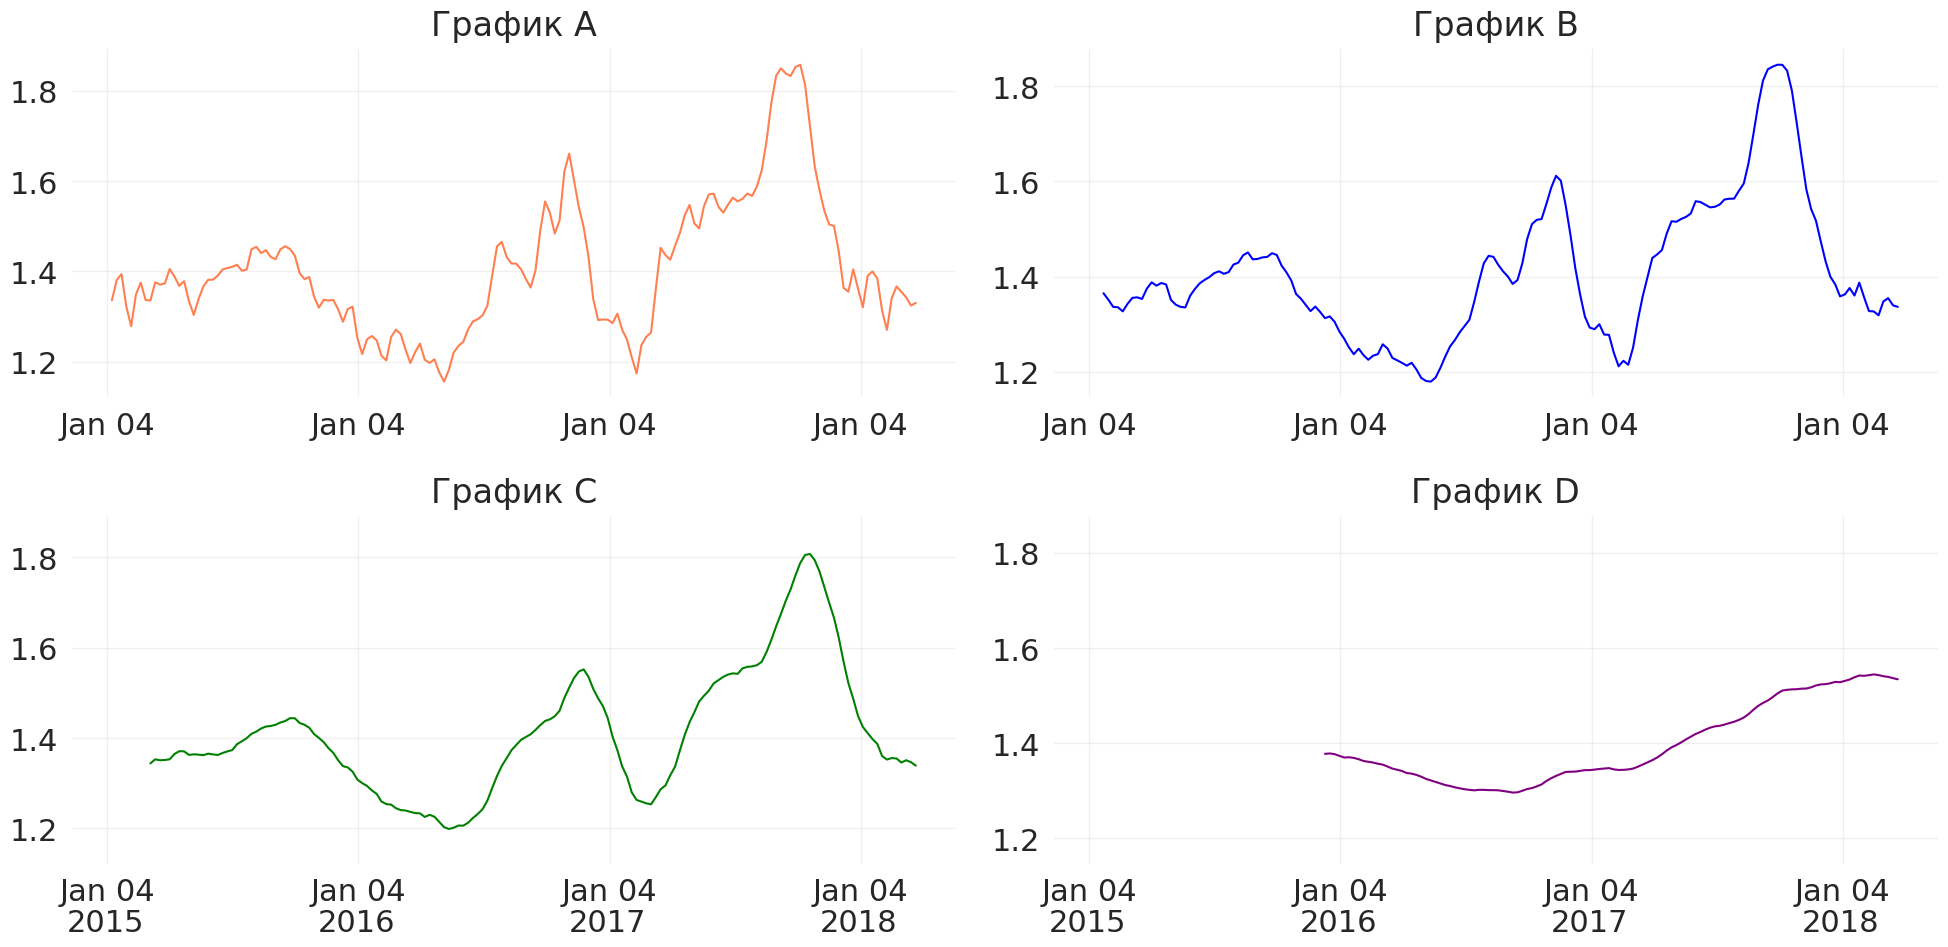

In [ ]:
# Отлично! Помимо авокадо, Толя любит смотреть на графики.
# Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
#'col' в sharey указывает на то, что у графиков в каждой колонке
# будет одинаковая ось y True в sharex означает, что ось x будет одинаковая
# у всех графиков
windows = [2,4,10,50]
colors = ['coral', 'blue', 'green', 'purple']
for window, ax, color in zip(windows, axes.flatten(), colors):
  ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
for ax in axes.flatten():
  # удаляем рамку
  ax.set_frame_on(False)
  # устанавливаем major locator – 4 января для каждого года
  ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
  # показывать в формате сокращенного названия месяца и дня (Jan 04)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  # под major locator - minor locator, т.е. редактируем minor ticks
  ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
  # показываем год
  ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
  # делаем сетку графика совсем немного серой и наполовину прозрачной
  ax.grid(True, color='#e2e2e2', alpha=0.5)
for name, ax in zip(['A','B','C','D'], axes.flatten()):
    ax.set_title(f'График {name}', pad=10)  # Увеличение расстояния от графика
for ax in axes[0]:  # Верхний ряд графиков
    ax.tick_params(labelbottom=True)  # Включаем подписи оси X
plt.tight_layout()
plt.show()

In [ ]:
windows

[2, 4, 10, 50]

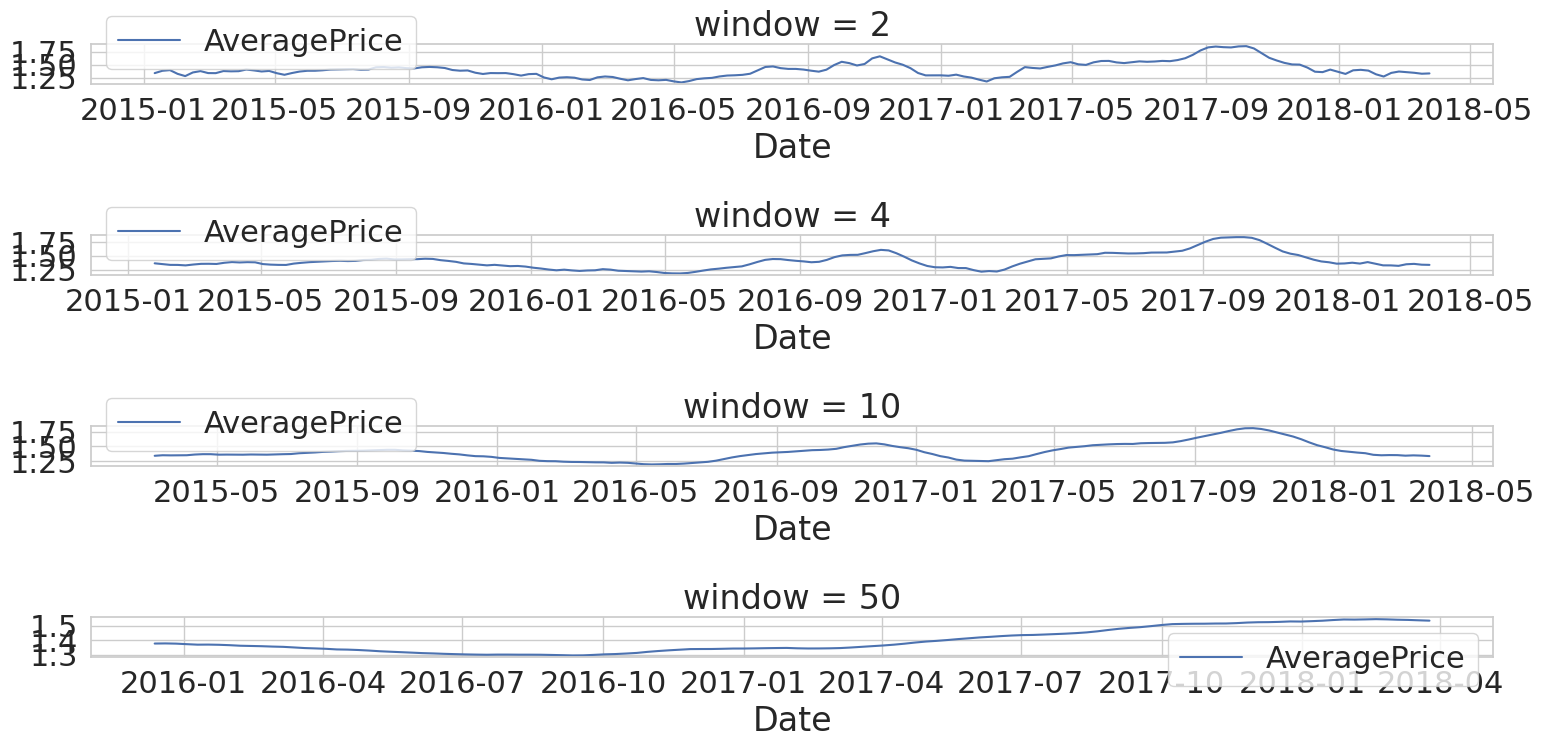

In [ ]:
windows = [2, 4, 10, 50]
fig, axes = plt.subplots(4, 1, figsize=(16, 8))

for i, window in enumerate(windows):
    df = avocado_mean.rolling(window=window).mean()
    sns.lineplot(data=df, ax=axes[i])
    axes[i].set_title(f'window = {window}')

plt.tight_layout()

3. Изучите параметры функции в документации и соотнесите их с соответствующим описанием.

win_type - Тип окна. Если None, то все наблюдения имеют равный вес.

min_periods - Минимальное число наблюдений находящихся в окне необходимых для подсчета значения (если меньше - возвращается NA). Значение по умолчанию равно размеру окна.

on - Колонка, на основе которой считать скользящее окно, если не на основе индексов

window - Размер окна. Число наблюдений используемых для подсчета какой-либо статистики

closed - Сделать интервал закрытым справа, слева, на обеих или ни на одной точке. По умолчанию используется значение "справа". Для фиксированных - "оба".

center - Позволяет использовать центрированное скользящее среднее

axis - Ось (столбцы или строки)

In [ ]:
# 4.Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2,
# чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [ ]:
avocado_ewm.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758


In [ ]:
# 5.И еще одно задание, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0
#  (использовать первую колонку как индекс). Для авокадо типа organic (type) в Чикаго (region)
#  посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4.
# Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [ ]:
avocado_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado_full.csv',
                        parse_dates=['Date'],
                        index_col=0)

In [ ]:
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [ ]:
ss_org_chic = avocado_full.query("type == 'organic' and region == 'Chicago'")

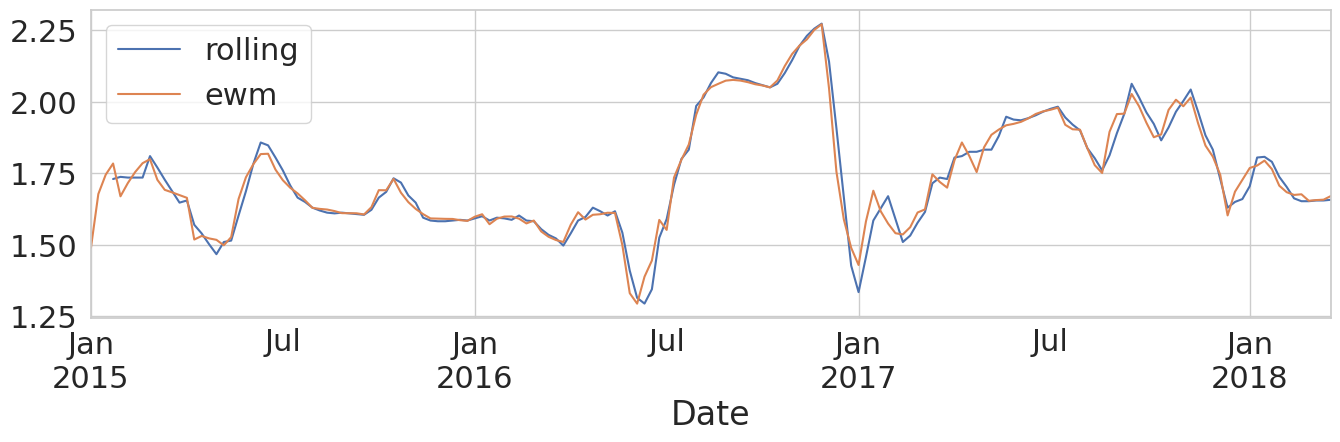

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
ss_org_chic.AveragePrice.rolling(window=4).mean().plot(ax=ax, label='rolling')
ss_org_chic.AveragePrice.ewm(span=4).mean().plot(ax=ax, label='ewm')
plt.legend()

In [ ]:
# Далее будем работать с данными по опозданиям в заключении сделок.
# В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/delays.csv')

In [ ]:
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [ ]:
# Прочитайте эти данные. Далее переведите delay в timedelta формат.
# Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.

In [ ]:
df['delay'] = df.delay.apply(lambda x:str(x).replace('-',''))

In [ ]:
df['delay'] = pd.to_timedelta(df['delay'])

In [ ]:
df.dtypes

,0
client_id,int64
company_id,int64
delay,timedelta64[ns]
revenue,int64


In [ ]:
df['delay']

,delay
0,1 days 14:57:48
1,4 days 02:14:23
2,0 days 06:08:57
3,0 days 23:40:19
4,1 days 13:21:53
...,...
259,0 days 05:32:08
260,3 days 23:27:14
261,1 days 15:22:34
262,2 days 17:15:02


In [ ]:
# Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [ ]:

bins = [pd.Timedelta(0, 'D'), pd.Timedelta(1, 'D'), pd.Timedelta(2, 'D'), pd.Timedelta(3, 'D'), pd.Timedelta(5,'D')] #Список с границами
labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']
df['delay_categories'] = pd.cut(df['delay'], bins=bins, labels=labels)

In [ ]:
 pd.Timedelta(3, 'D')

Timedelta('3 days 00:00:00')

In [ ]:
df.delay_categories

,delay_categories
0,1-2 days
1,more than 3 days
2,less than 1 day
3,less than 1 day
4,1-2 days
...,...
259,less than 1 day
260,more than 3 days
261,1-2 days
262,2-3 days


In [ ]:
bar = df.delay_categories.value_counts()

In [ ]:
bar.head()

,delay_categories,client_id
3,more than 3 days,107
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47


In [ ]:
px.bar(bar)

In [ ]:
bar_plotly = df.groupby('delay_categories',as_index=False).agg({'client_id':'count'}).sort_values('client_id',ascending=False)

<ipython-input-179-a0c9e4321ca9>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
bar_plotly

,delay_categories,client_id
3,more than 3 days,107
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47


In [ ]:
fig = px.bar(
    bar_plotly,
    x="delay_categories",
    y="client_id",
    text="client_id",  # Отображение значений на столбцах
    color="delay_categories",  # Цветовая дифференциация
    color_discrete_sequence=px.colors.qualitative.Set2  # Красивые цвета
)
# Улучшение оформления
fig.update_traces(
    textposition="outside",  # Подписи над столбцами
    marker=dict(line=dict(width=1, color="black"))  # Контур столбцов
)

fig.update_layout(
    title="Распределение клиентов по категориям задержек",
    xaxis_title="Категория задержки",
    yaxis_title="Количество клиентов",
    plot_bgcolor="white",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    height=600, width=900  # Размер графика
)
fig.show()


In [ ]:
df.delay_categories.value_counts()

,count
delay_categories,
less than 1 day,71
2-3 days,67
more than 3 days,67
1-2 days,59
